## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_roc_curve
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

All are non-null values having 21 columns 7043 entries and 18 object type coumns,1 float type column and 2 integer type columns.

In [5]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

customerID is unique as there are only 7043 entries of each customer and each customer has its own unique ID. We can remove this column as it will affect to predict the Churn.

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

customerID: Customer ID 

gender: Whether the customer is a male or a female

SeniorCitizen:Whether the customer is a senior citizen or not (1, 0)

Partner:Whether the customer has a partner or not (Yes, No)

Dependents:Whether the customer has dependents or not (Yes, No)

tenure:Number of months the customer has stayed with the company

PhoneService:Whether the customer has a phone service or not (Yes, No)

MultipleLines:Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService:Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity:Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup:Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection:Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport:Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV
Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies:Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract:The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling:Whether the customer has paperless billing or not (Yes, No)

PaymentMethod:The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges:The total amount charged to the customer

Churn:Whether the customer churned or not (Yes or No)

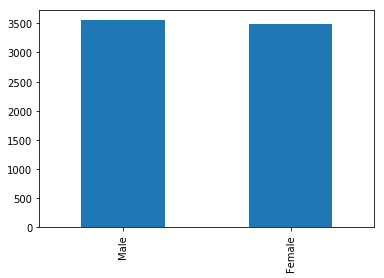

In [7]:
data.gender.value_counts().plot(kind='bar')
plt.show()

In [8]:
data['gender']=data.gender.replace({"Male":1,"Female":0})

male and female are distributed to all records. and replacing male with 1 anfd female with 0.

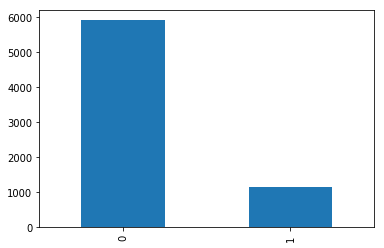

In [9]:
data.SeniorCitizen.value_counts().plot(kind='bar')

Less no. of senior Citizen type customer.

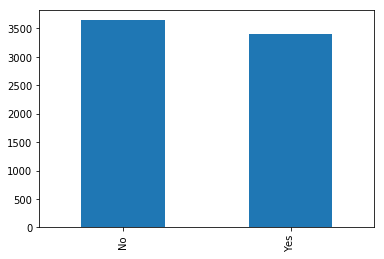

In [10]:
data.Partner.value_counts().plot(kind='bar')

In [11]:
data['Partner']=data['Partner'].replace({"No":0,"Yes":1})

There are 45%+ Customer are Partner of Company.

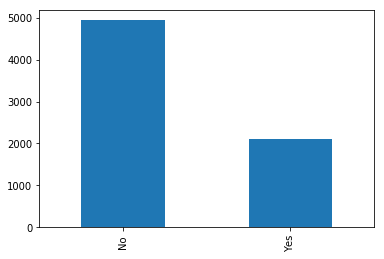

In [12]:
data.Dependents.value_counts().plot(kind='bar')

In [13]:
data['Dependents']=data['Dependents'].replace({"No":0,"Yes":1})

there are seems that there are about 2000 customer that are dependent to company.

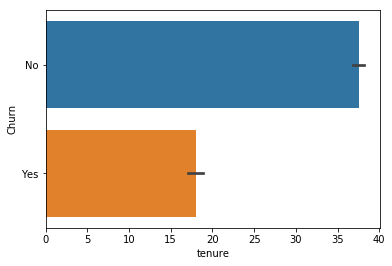

In [14]:
sns.barplot(data.tenure,data.Churn)

Whose tenure is less than 20 they Customer are churn. and this feature is highle used to predict the Churn.

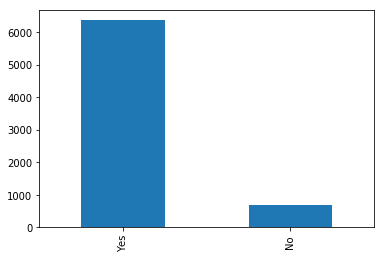

In [15]:
data.PhoneService.value_counts().plot(kind='bar')

In [16]:
data['PhoneService']=data['PhoneService'].replace({"No":0,"Yes":1})

Very less Customer that don't have PhoneService.

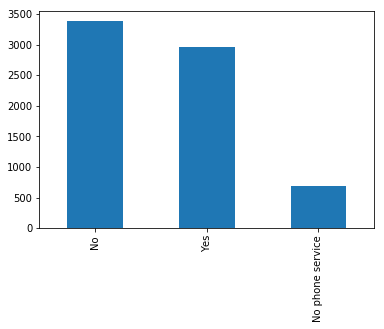

In [17]:
data.MultipleLines.value_counts().plot(kind='bar')

In [18]:
data['MultipleLines']=data['MultipleLines'].replace({"No":0,"No phone service":0,"Yes":1})

there are about 3000 customer who has multipleLines to contact.

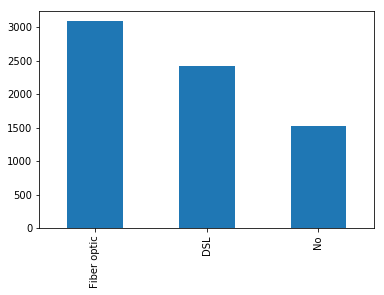

In [19]:
data.InternetService.value_counts().plot(kind='bar')

In [20]:
data['InternetService']=data['InternetService'].replace({"No":0,"DSL":1,"Fiber optic":1})

there are about 1500 customer that has no InternetService.

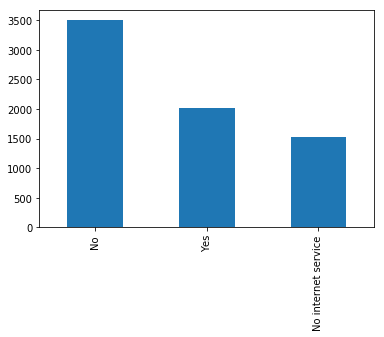

In [21]:
data.OnlineSecurity.value_counts().plot(kind='bar')

In [22]:
data['OnlineSecurity']=data['OnlineSecurity'].replace({"No":0,"No internet service":0,"Yes":1})

there are about 2000 customer that has OnlineSecurity.

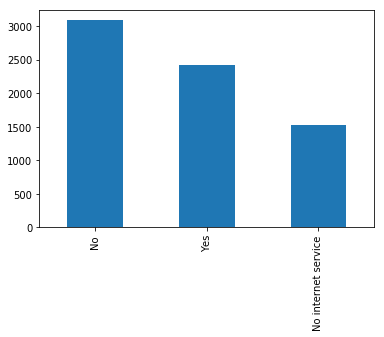

In [23]:
data.OnlineBackup.value_counts().plot(kind='bar')

In [24]:
data['OnlineBackup']=data['OnlineBackup'].replace({"No":0,"No internet service":0,"Yes":1})

there are about 2500 customer  that don't have OnlineBackUp.

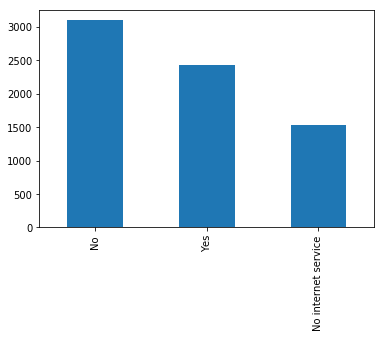

In [25]:
data.DeviceProtection.value_counts().plot(kind='bar')

In [26]:
data['DeviceProtection']=data['DeviceProtection'].replace({"No":0,"No internet service":0,"Yes":1})

there are about 2500 customer that have DeviceProtection.

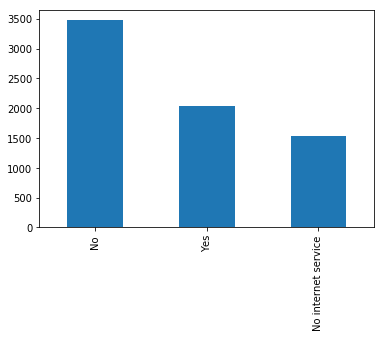

In [27]:
data.TechSupport.value_counts().plot(kind='bar')

In [28]:
data['TechSupport']=data['TechSupport'].replace({"No":0,"No internet service":0,"Yes":1})

There are about 2000 customer that has TechSupport.

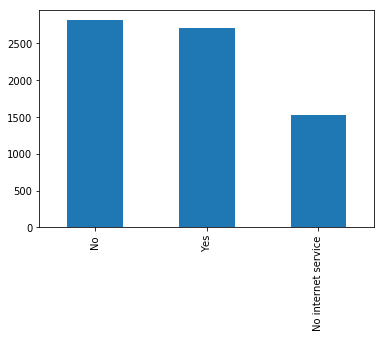

In [29]:
data.StreamingTV.value_counts().plot(kind='bar')

In [30]:
data['StreamingTV']=data['StreamingTV'].replace({"No":0,"No internet service":0,"Yes":1})

there are more than 2500 customer that has StreamingTV.

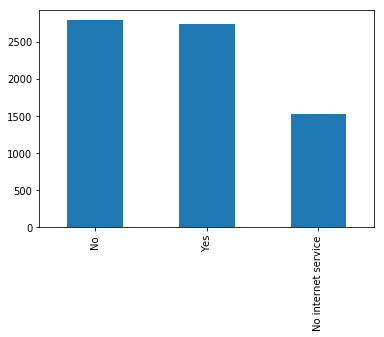

In [31]:
data.StreamingMovies.value_counts().plot(kind='bar')

In [32]:
data['StreamingMovies']=data['StreamingMovies'].replace({"No":0,"No internet service":0,"Yes":1})

there are more than 2500 customer that has StreamingMovies.

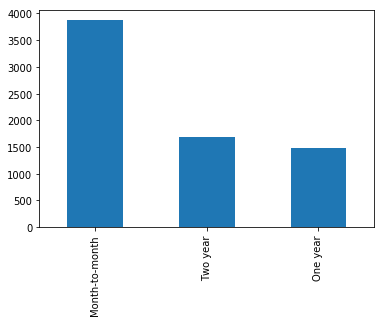

In [33]:
data.Contract.value_counts().plot(kind='bar')

In [34]:
data['Contract']=data['Contract'].replace({"Month-to-month":0,"One year":1,"Two year":2})

there are customer that has 3500+ Month-to-month contract,1500+ customer having Two year contract and 1500+ cutomer has two year contract.

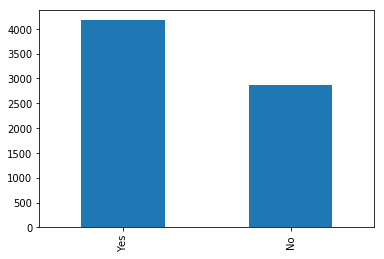

In [35]:
data.PaperlessBilling.value_counts().plot(kind='bar')

In [36]:
data['PaperlessBilling']=data['PaperlessBilling'].replace({"No":0,"Yes":1})

4000+ customer has PaperBilling.

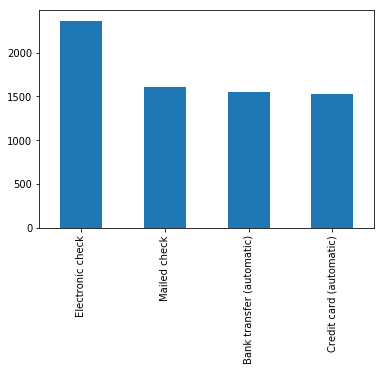

In [37]:
data.PaymentMethod.value_counts().plot(kind='bar')

In [38]:
data['PaymentMethod']=data['PaymentMethod'].replace({"Electronic check":0,"Mailed check":1,"Bank transfer (automatic)":2,"Credit card (automatic)":3})

2000+ customer has Electronic Check PaymentMethod while others having less than 2000 paymentMethod.

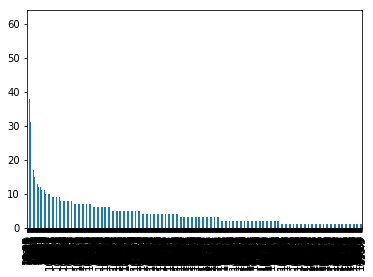

In [39]:
data.MonthlyCharges.value_counts().plot(kind='bar')

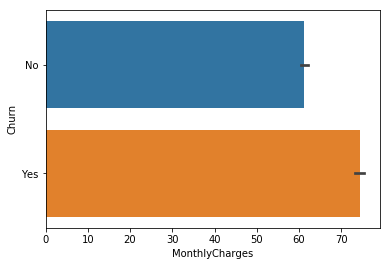

In [40]:
sns.barplot(data.MonthlyCharges,data.Churn)

MonthlyCharges Greater than 60 has definitely Customer Churn

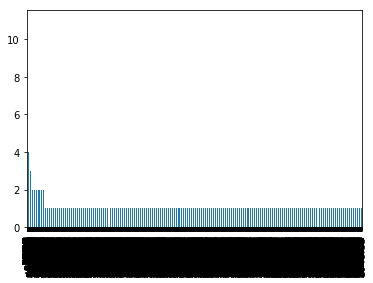

In [41]:
data.TotalCharges.value_counts().plot(kind='bar')

In [42]:
data.TotalCharges.value_counts()

20.2       11
           11
19.75       9
19.65       8
20.05       8
19.9        8
19.55       7
45.3        7
20.25       6
19.45       6
20.15       6
20.45       5
20.3        5
19.85       4
19.2        4
20.5        4
50.15       4
49.9        4
20.35       4
69.95       4
70.6        4
20.4        4
44.4        4
19.95       4
75.3        4
69.9        4
19.5        4
19.4        4
74.7        4
69.6        4
           ..
7244.7      1
1344.5      1
3822.45     1
2917.5      1
3275.15     1
4126.35     1
95.6        1
2196.15     1
1025.95     1
2780.6      1
1212.85     1
1520.9      1
59.55       1
270.6       1
898.35      1
3541.1      1
677.9       1
122         1
893         1
390.4       1
889.9       1
3482.85     1
818.45      1
244.85      1
4758.8      1
272         1
4097.05     1
33.2        1
1048.85     1
6273.4      1
Name: TotalCharges, Length: 6531, dtype: int64

In [43]:
data['TotalCharges']=data.TotalCharges.replace(" ",np.nan)

In [44]:
data['TotalCharges'].isna().sum()

11

In [45]:
data['TotalCharges']=data.TotalCharges.astype(float)

In [46]:
data.TotalCharges.fillna(data.TotalCharges.mean(),inplace=True)

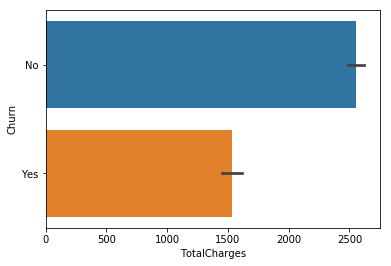

In [47]:
sns.barplot(data.TotalCharges,data.Churn)

Replace the space with none and null values are filled with their mean.

TotalCharges>15000 has no Churn.

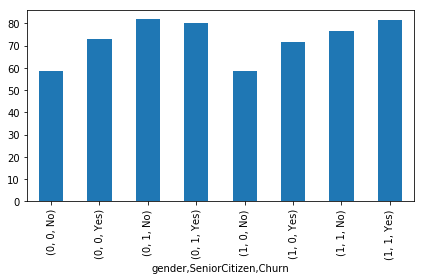

In [48]:
data.groupby(['gender','SeniorCitizen','Churn'])['MonthlyCharges'].mean().plot(kind='bar')
plt.tight_layout()

female Customer who are not SeniorCitizen and has no Churn their average MonthlyCharges is almost 60 while having Churn their average MonthlyCharges are almost about 70.

Female who are Senior Customer and has or not Churn are almost having average Monthly Charges 80.

Male Customer who are not SeniorCitizen and has no Churn their average MonthlyCharges is almost 60 while having Churn their average MonthlyCharges are almost about 70.

Male Customer who are SeniorCitizen and has no Churn their average MonthlyCharges is almost 70 while having Churn their average MonthlyCharges are almost about 80.

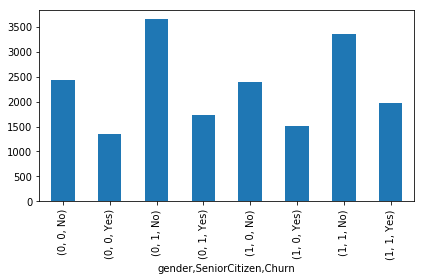

In [49]:
data.groupby(['gender','SeniorCitizen','Churn'])['TotalCharges'].mean().plot(kind='bar')
plt.tight_layout()

female Customer who are not SeniorCitizen and has no Churn their average TotalCharges is almost 2500 while having Churn their average TotalCharges are in range of 1000-1500.

Female who are Senior Customer and has not Churn are their average TotalCharges 3500+ while having Churn their average Charges are about 1500.

Male Customer who are not SeniorCitizen and has no Churn their average TotalCharges is almost 2500 while having Churn their average MonthlyCharges are almost about 1500.

Male Customer who are SeniorCitizen and has no Churn their average TotalCharges is almost or less 3500 while having Churn their average TotalCharges are almost about 2000.

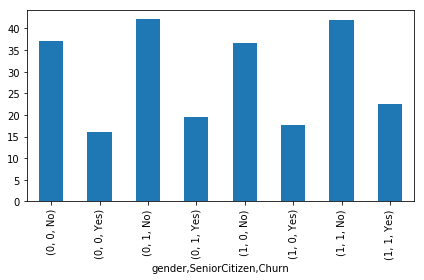

In [50]:
data.groupby(['gender','SeniorCitizen','Churn'])['tenure'].mean().plot(kind='bar')
plt.tight_layout()

female Customer who are not SeniorCitizen and has no Churn their average tenure is range of 35 to 40 while having Churn their average tenure are in range of 15 to 20.

Female who are Senior Customer and has not Churn are their average tenure 40+ while having Churn their average tenure are about 20.

Male Customer who are not SeniorCitizen and has no Churn their average tenure is range of 30 to 40 while having Churn their average tenure are in range of 15 to 20.

Male Customer who are SeniorCitizen and has no Churn their average tenure is almost 40 or more while having Churn their average tenure are almost about 20 or more.

<Figure size 5760x720 with 0 Axes>

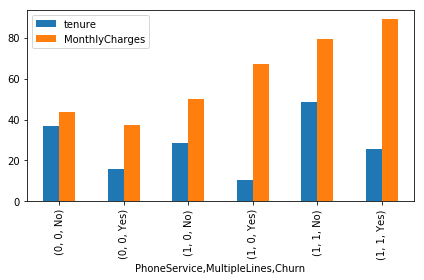

In [51]:
plt.figure(figsize=(80,10))
data.groupby(['PhoneService','MultipleLines','Churn'])[['tenure','MonthlyCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer with no PhoneService,no MultipleLines with no Churn their average tenure is about less than 40 and MonthlyCharge is greater than 40.

Customer with no PhoneService,no MultipleLines with Churn their average tenure is about less than 20 and MonthlyCharge is about to be  40.

Customer with PhoneService,no MultipleLines with no Churn their average tenure is more than 20 and MonthlyCharge is greater than 40.

Customer with PhoneService,no MultipleLines with Churn their average tenure is less than 20 and MonthlyCharge is greater than 60.

Customer with PhoneService, MultipleLines with no Churn their average tenure is more than 40 and MonthlyCharge is greater than 60.

Customer with PhoneService, MultipleLines with Churn their average tenure is more than 20 and MonthlyCharge is greater than 80.

<Figure size 5760x720 with 0 Axes>

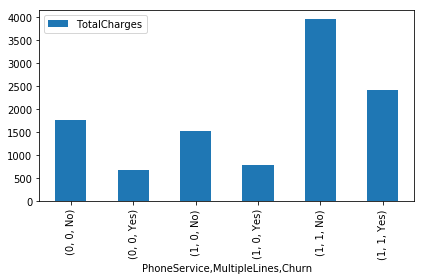

In [52]:
plt.figure(figsize=(80,10))
data.groupby(['PhoneService','MultipleLines','Churn'])[['TotalCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer with PhoneService, MultipleLines with no Churn has highest average TotalCharges i.e. seems to be 4000.

<Figure size 5760x1440 with 0 Axes>

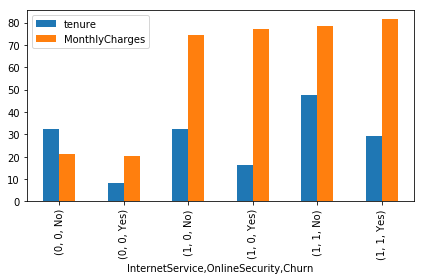

In [53]:
plt.figure(figsize=(80,20))
data.groupby(['InternetService','OnlineSecurity','Churn'])[['tenure','MonthlyCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer with InternetService, OnlineSecurity with no Churn has highest average tenure i.e. seems to be 50 and with or without Churn has highest average MonthlyCharges that seems to be 80.

<Figure size 5760x1440 with 0 Axes>

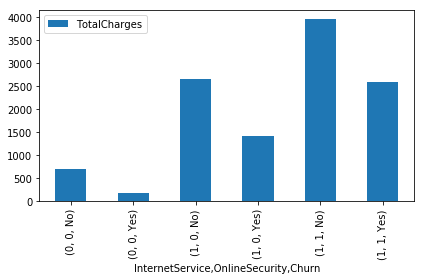

In [54]:
plt.figure(figsize=(80,20))
data.groupby(['InternetService','OnlineSecurity','Churn'])[['TotalCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer with InternetService, OnlineSecurity with no Churn has highest average totalCharges is about4500.

<Figure size 5760x1440 with 0 Axes>

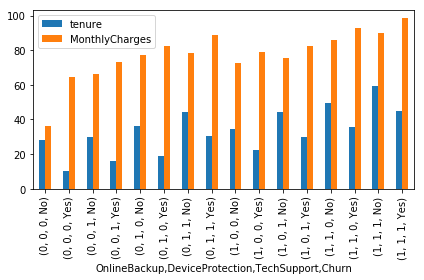

In [55]:
plt.figure(figsize=(80,20))
data.groupby(['OnlineBackup', 'DeviceProtection', 'TechSupport','Churn'])[['tenure','MonthlyCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer that has facility of OnlineBackUp,DeviceProtection,TechSupport with no Churn has highest average tenure of 60 while others.

Customer that has facility of OnlineBackUp,DeviceProtection,TechSupport with Churn has highest average MonthlyCharges of 100 while others.

<Figure size 5760x1440 with 0 Axes>

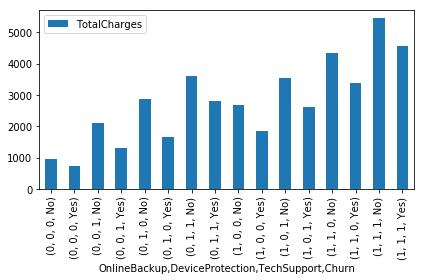

In [56]:
plt.figure(figsize=(80,20))
data.groupby(['OnlineBackup', 'DeviceProtection', 'TechSupport','Churn'])[['TotalCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer that has facility of OnlineBackUp,DeviceProtection,TechSupport with no Churn has highest average TotalCharges of more than 5000 while others.

<Figure size 5760x1440 with 0 Axes>

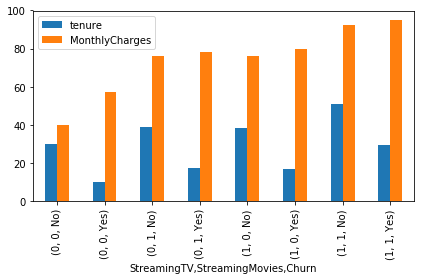

In [57]:
plt.figure(figsize=(80,20))
data.groupby(['StreamingTV', 'StreamingMovies','Churn'])[['tenure','MonthlyCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer that has facility of StreamingMovies or TV with no Churn has highest average tenure of about 60 while others.

Customer that has facility of StreamingMovies or TV with Churn has highest average MonthlyCharges of 100 while others.

<Figure size 5760x1440 with 0 Axes>

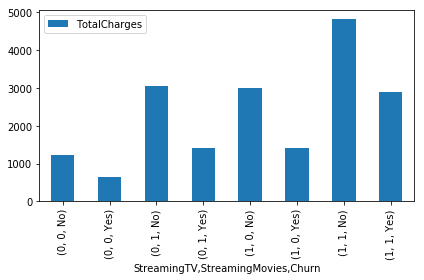

In [58]:
plt.figure(figsize=(80,20))
data.groupby(['StreamingTV', 'StreamingMovies','Churn'])[['TotalCharges']].mean().plot(kind='bar')
plt.tight_layout()

Customer that has facility of StreamMovies and TV with no Churn has highest average TotalCharges of more than 5000 while others.

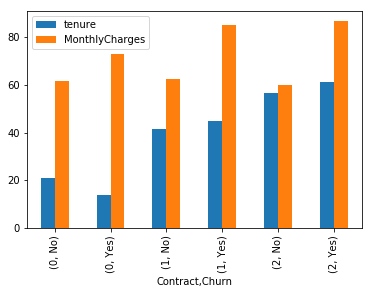

In [59]:
data.groupby(['Contract','Churn'])['tenure','MonthlyCharges'].mean().plot(kind='bar')

Customer that has Contract of Two Year with Churn has highest average tenure of about 60 while others.

Customer that has Contract of Two Year with Churn Churn has highest average MonthlyCharges of more than 80 while others.

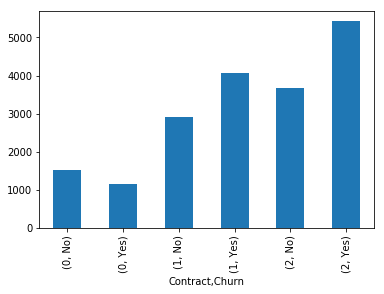

In [60]:
data.groupby(['Contract','Churn'])['TotalCharges'].mean().plot(kind='bar')

Customer that has Contract of Two Year with Churn has highest average TotalCharges of more than 5000 while others.

<Figure size 5760x1440 with 0 Axes>

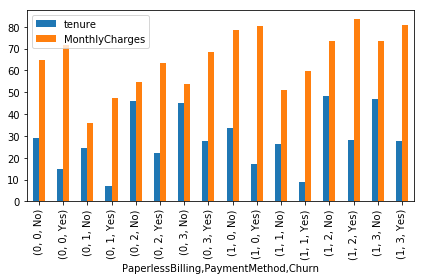

In [61]:
plt.figure(figsize=(80,20))
data.groupby(['PaperlessBilling','PaymentMethod','Churn'])[['tenure',"MonthlyCharges"]].mean().plot(kind='bar')
plt.tight_layout()

Custom that has PaperBilling with 2nd type of paymentMethod with Churn has highst average MonthlyCharge of greater than 80.

The tenure is maximum for no Churn with any type of paymentMethod.

<Figure size 5760x1440 with 0 Axes>

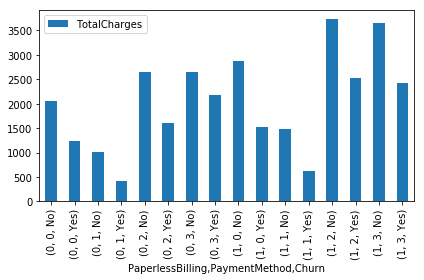

In [62]:
plt.figure(figsize=(80,20))
data.groupby(['PaperlessBilling','PaymentMethod','Churn'])[['TotalCharges']].mean().plot(kind='bar')
plt.tight_layout()

Having PaperlessBIlling with 2nd & 3rd type of paymentMethod without Churn has maximum TotalCharges.

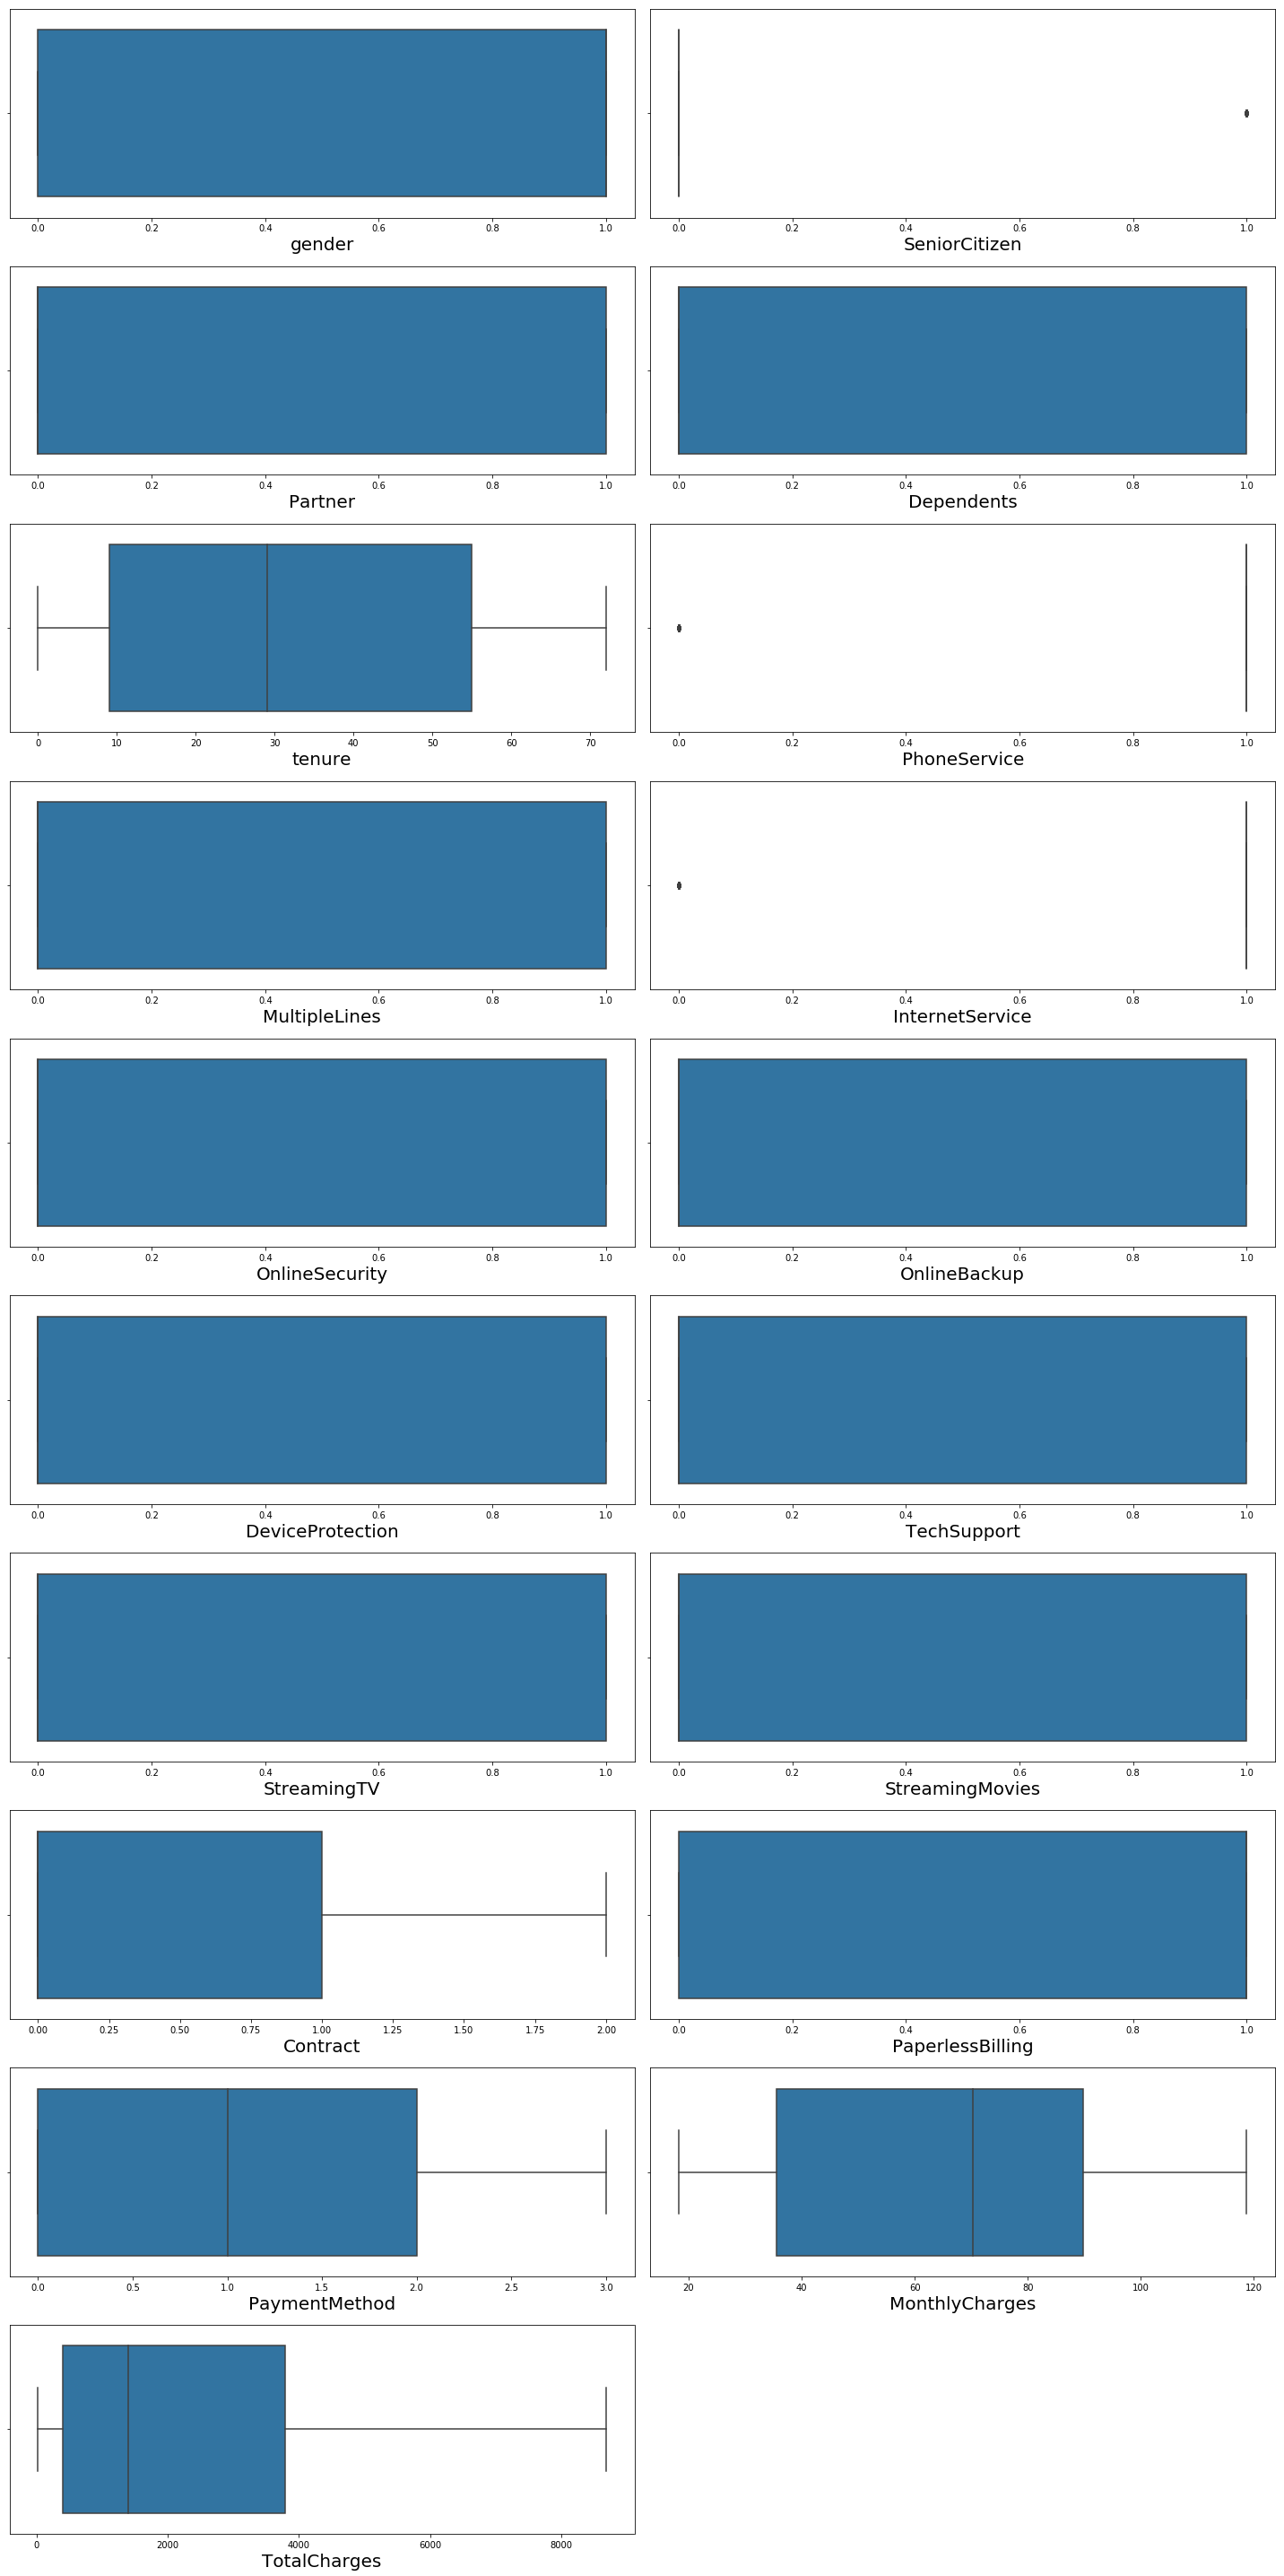

In [63]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(columns=['Churn',"customerID"],axis=1):
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

Seems no Outliers in any features.

In [64]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692,2283.300441
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047,2265.000258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1400.550000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


totalCharges less than 50 seems not be proper. We have to remove such records.

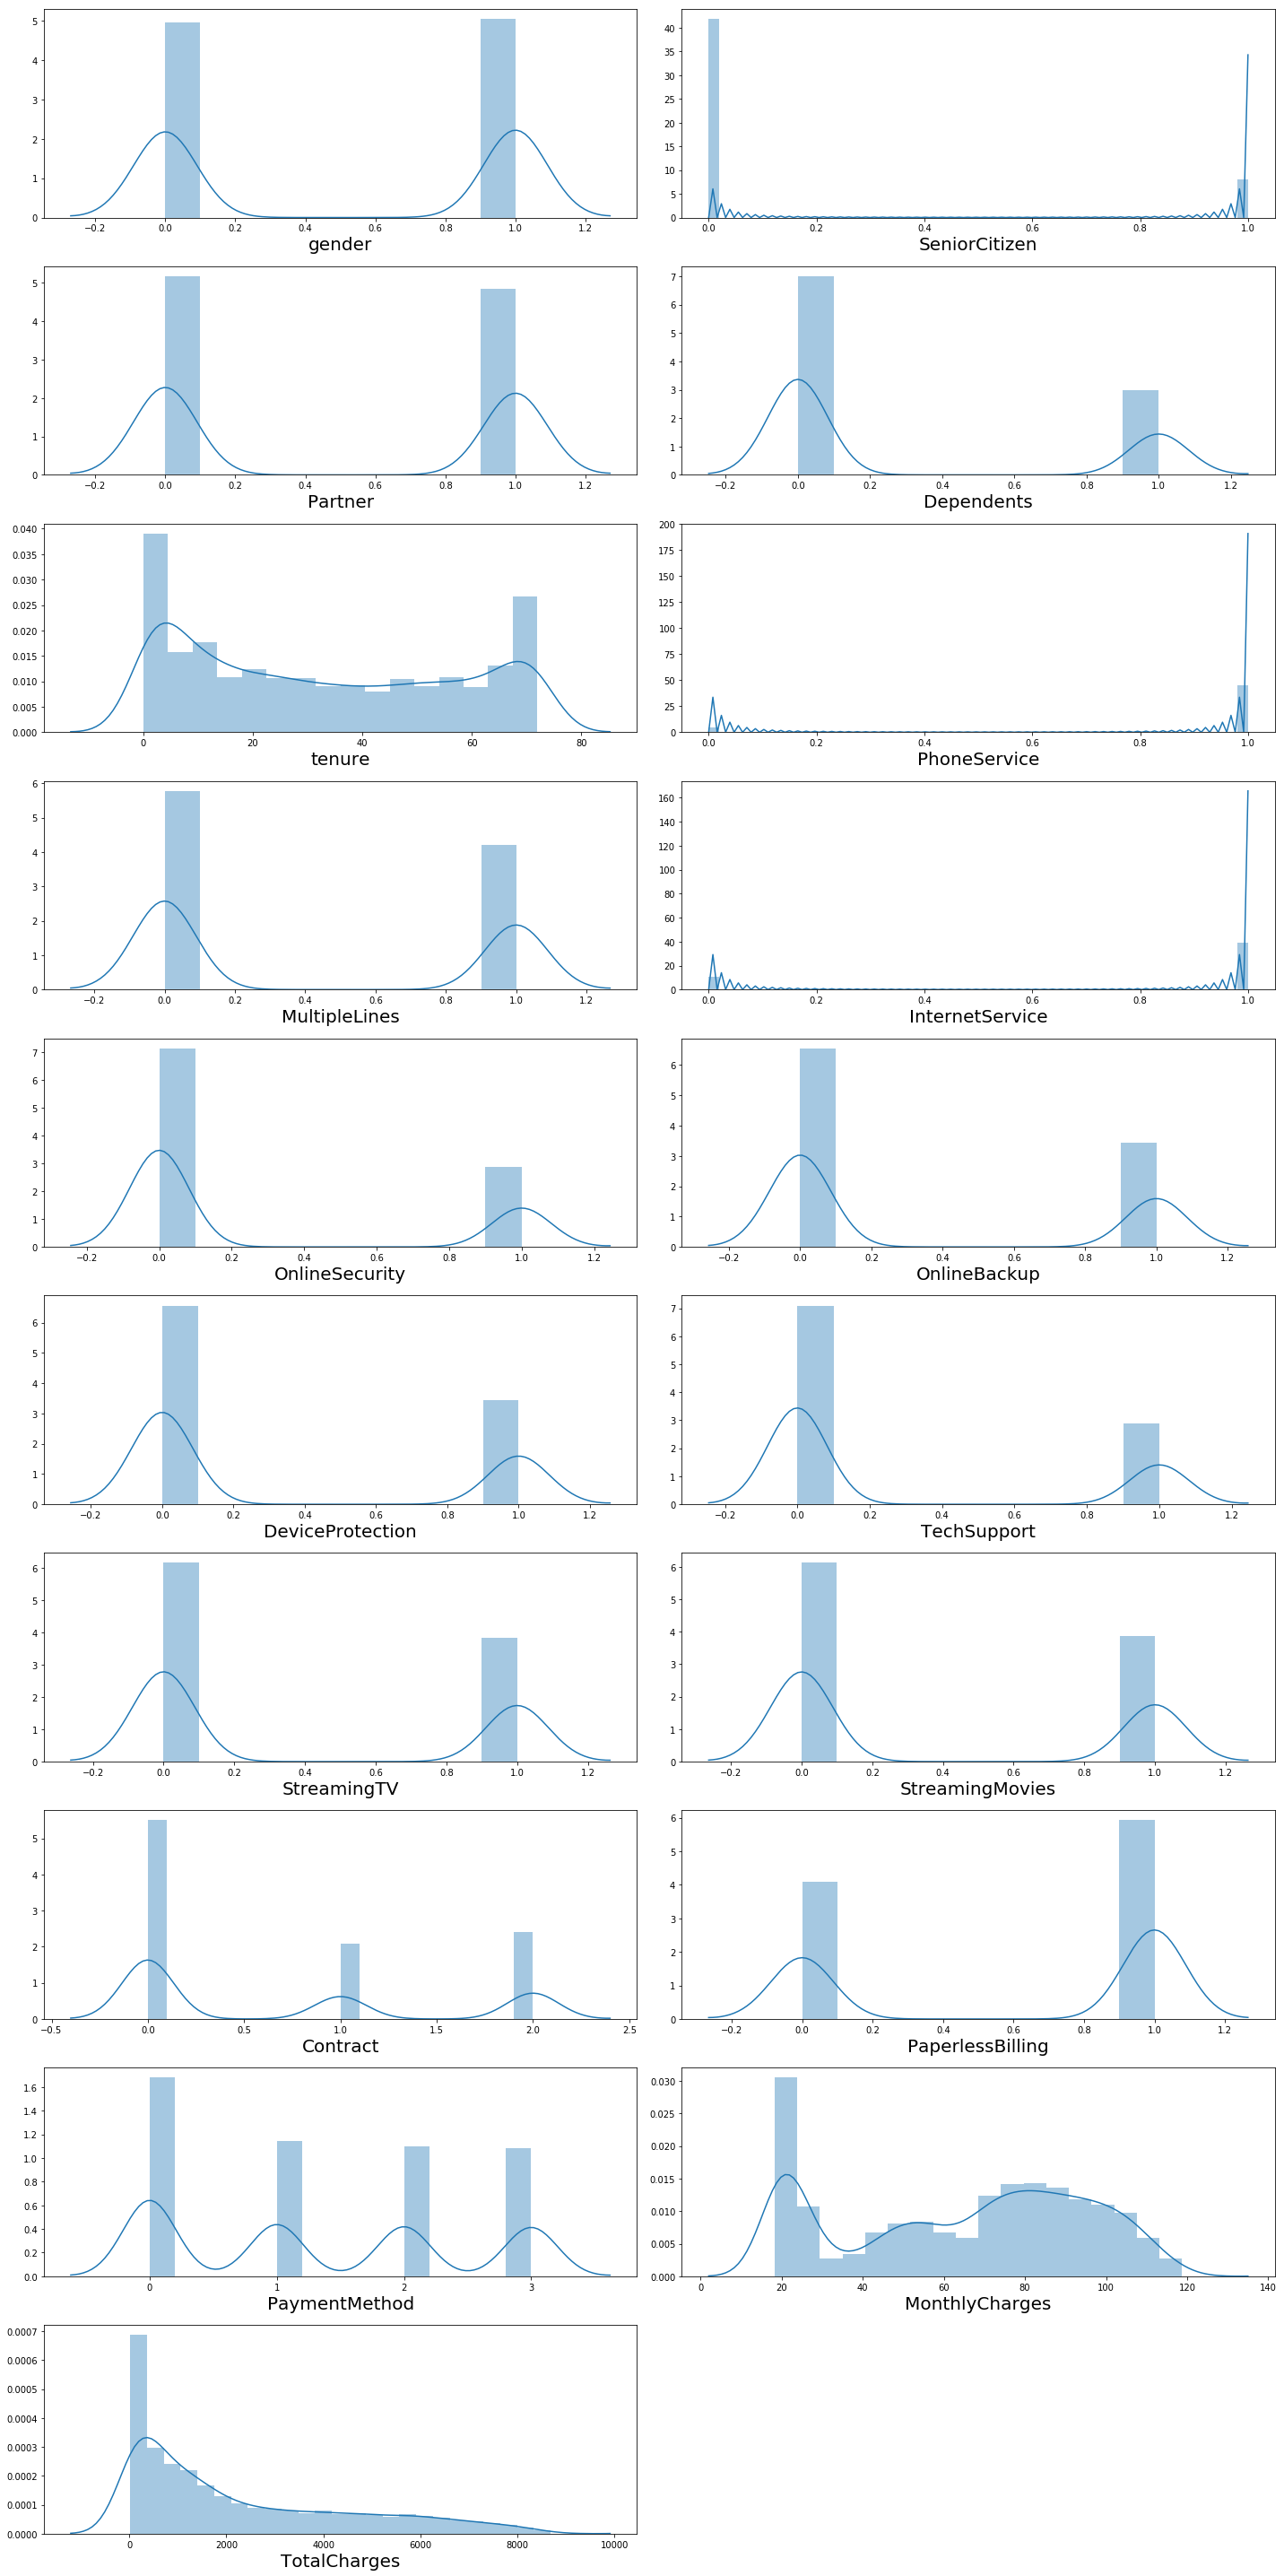

In [65]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(columns=['Churn',"customerID"],axis=1):
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

SeniorCitizen,Dependents,PhoneService,InternetService,OnlineSecurity,TechSupport,TotalCharges these colmns doesn't seems to me normnally distributed.

In [66]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.316610
InternetService    -1.375769
OnlineSecurity      0.943722
OnlineBackup        0.652817
DeviceProtection    0.657450
TechSupport         0.924630
StreamingTV         0.475581
StreamingMovies     0.460199
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod       0.218405
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

above features that are not in range of 0.5 to -0.5 are skewed.

In [67]:
data['Churn']=data['Churn'].replace({"Yes":1,"No":0})

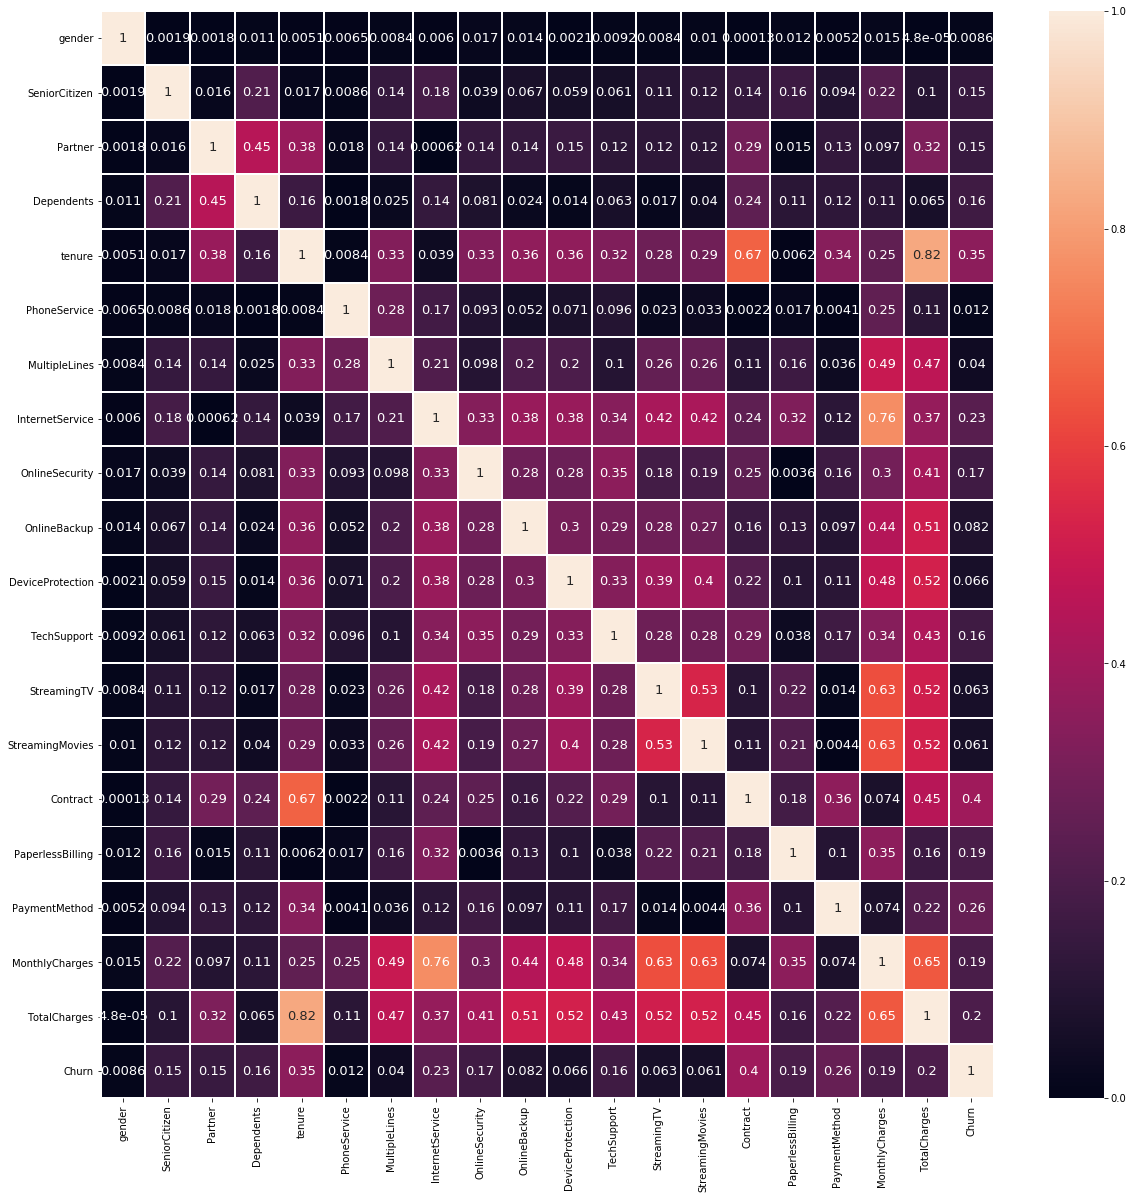

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":13},linewidths=True)
plt.show()

82% multi-Colinear exists in features TotalCharges & tenure.

76% multi-Colinear exists in features MonthlyCharges & InternetService.

## Data Cleaning

In [69]:
data.drop_duplicates(inplace=True)

In [70]:
data=data[data.TotalCharges>50]

In [71]:
data['MonthlyCharges']=np.sqrt(data.MonthlyCharges)
data['TotalCharges']=np.sqrt(data.TotalCharges)
data['tenure']=np.sqrt(data.tenure)

In [72]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000
mean,0.501797,0.166816,0.500749,0.305331,5.336358,0.907457,0.443696,0.802636,0.300389,0.361935,0.361785,0.304133,0.404462,0.407607,0.725666,0.603025,1.333932,7.920798,42.955103,0.257412
std,0.500034,0.372840,0.500037,0.460582,2.366916,0.289812,0.496857,0.398040,0.458462,0.480596,0.480553,0.460074,0.490824,0.491426,0.840368,0.489307,1.163272,2.003734,23.692983,0.437241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.272002,7.074602,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.316625,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.667083,22.780748,0.000000
50%,1.000000,0.000000,1.000000,0.000000,5.567764,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.571756,39.165355,0.000000
75%,1.000000,0.000000,1.000000,1.000000,7.549834,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,9.515119,62.918201,1.000000
max,1.000000,1.000000,1.000000,1.000000,8.485281,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,10.897247,93.192274,1.000000


Using sqrt to MonthlyCharges,TotalCharges & tenure now our data seems to be proper.

In [73]:
data.skew()

gender             -0.007189
SeniorCitizen       1.787810
Partner            -0.002996
Dependents          0.845571
tenure             -0.296188
PhoneService       -2.812714
MultipleLines       0.226710
InternetService    -1.521086
OnlineSecurity      0.871045
OnlineBackup        0.574731
DeviceProtection    0.575406
TechSupport         0.851714
StreamingTV         0.389411
StreamingMovies     0.376132
Contract            0.551980
PaperlessBilling   -0.421231
PaymentMethod       0.182516
MonthlyCharges     -0.599236
TotalCharges        0.298622
Churn               1.109961
dtype: float64

In [74]:
features=['SeniorCitizen','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','MonthlyCharges']
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,SeniorCitizen,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges
1,-0.447455,-0.662974,0.319343,0.495879,1.526110,-0.753152,1.328184,-0.661102,0.707796,-0.354567
2,-0.447455,-0.662974,0.319343,0.495879,1.526110,1.327753,-0.752908,-0.661102,-0.925027,-0.458873
3,-0.447455,-0.662974,-3.131425,0.495879,1.526110,-0.753152,1.328184,1.512625,0.707796,-0.842895
4,-0.447455,-0.662974,0.319343,0.495879,-0.655261,-0.753152,-0.752908,-0.661102,-0.925027,0.113864
5,-0.447455,-0.662974,0.319343,0.495879,-0.655261,-0.753152,1.328184,-0.661102,-0.925027,1.127418


In [75]:
data.shape

(6678, 21)

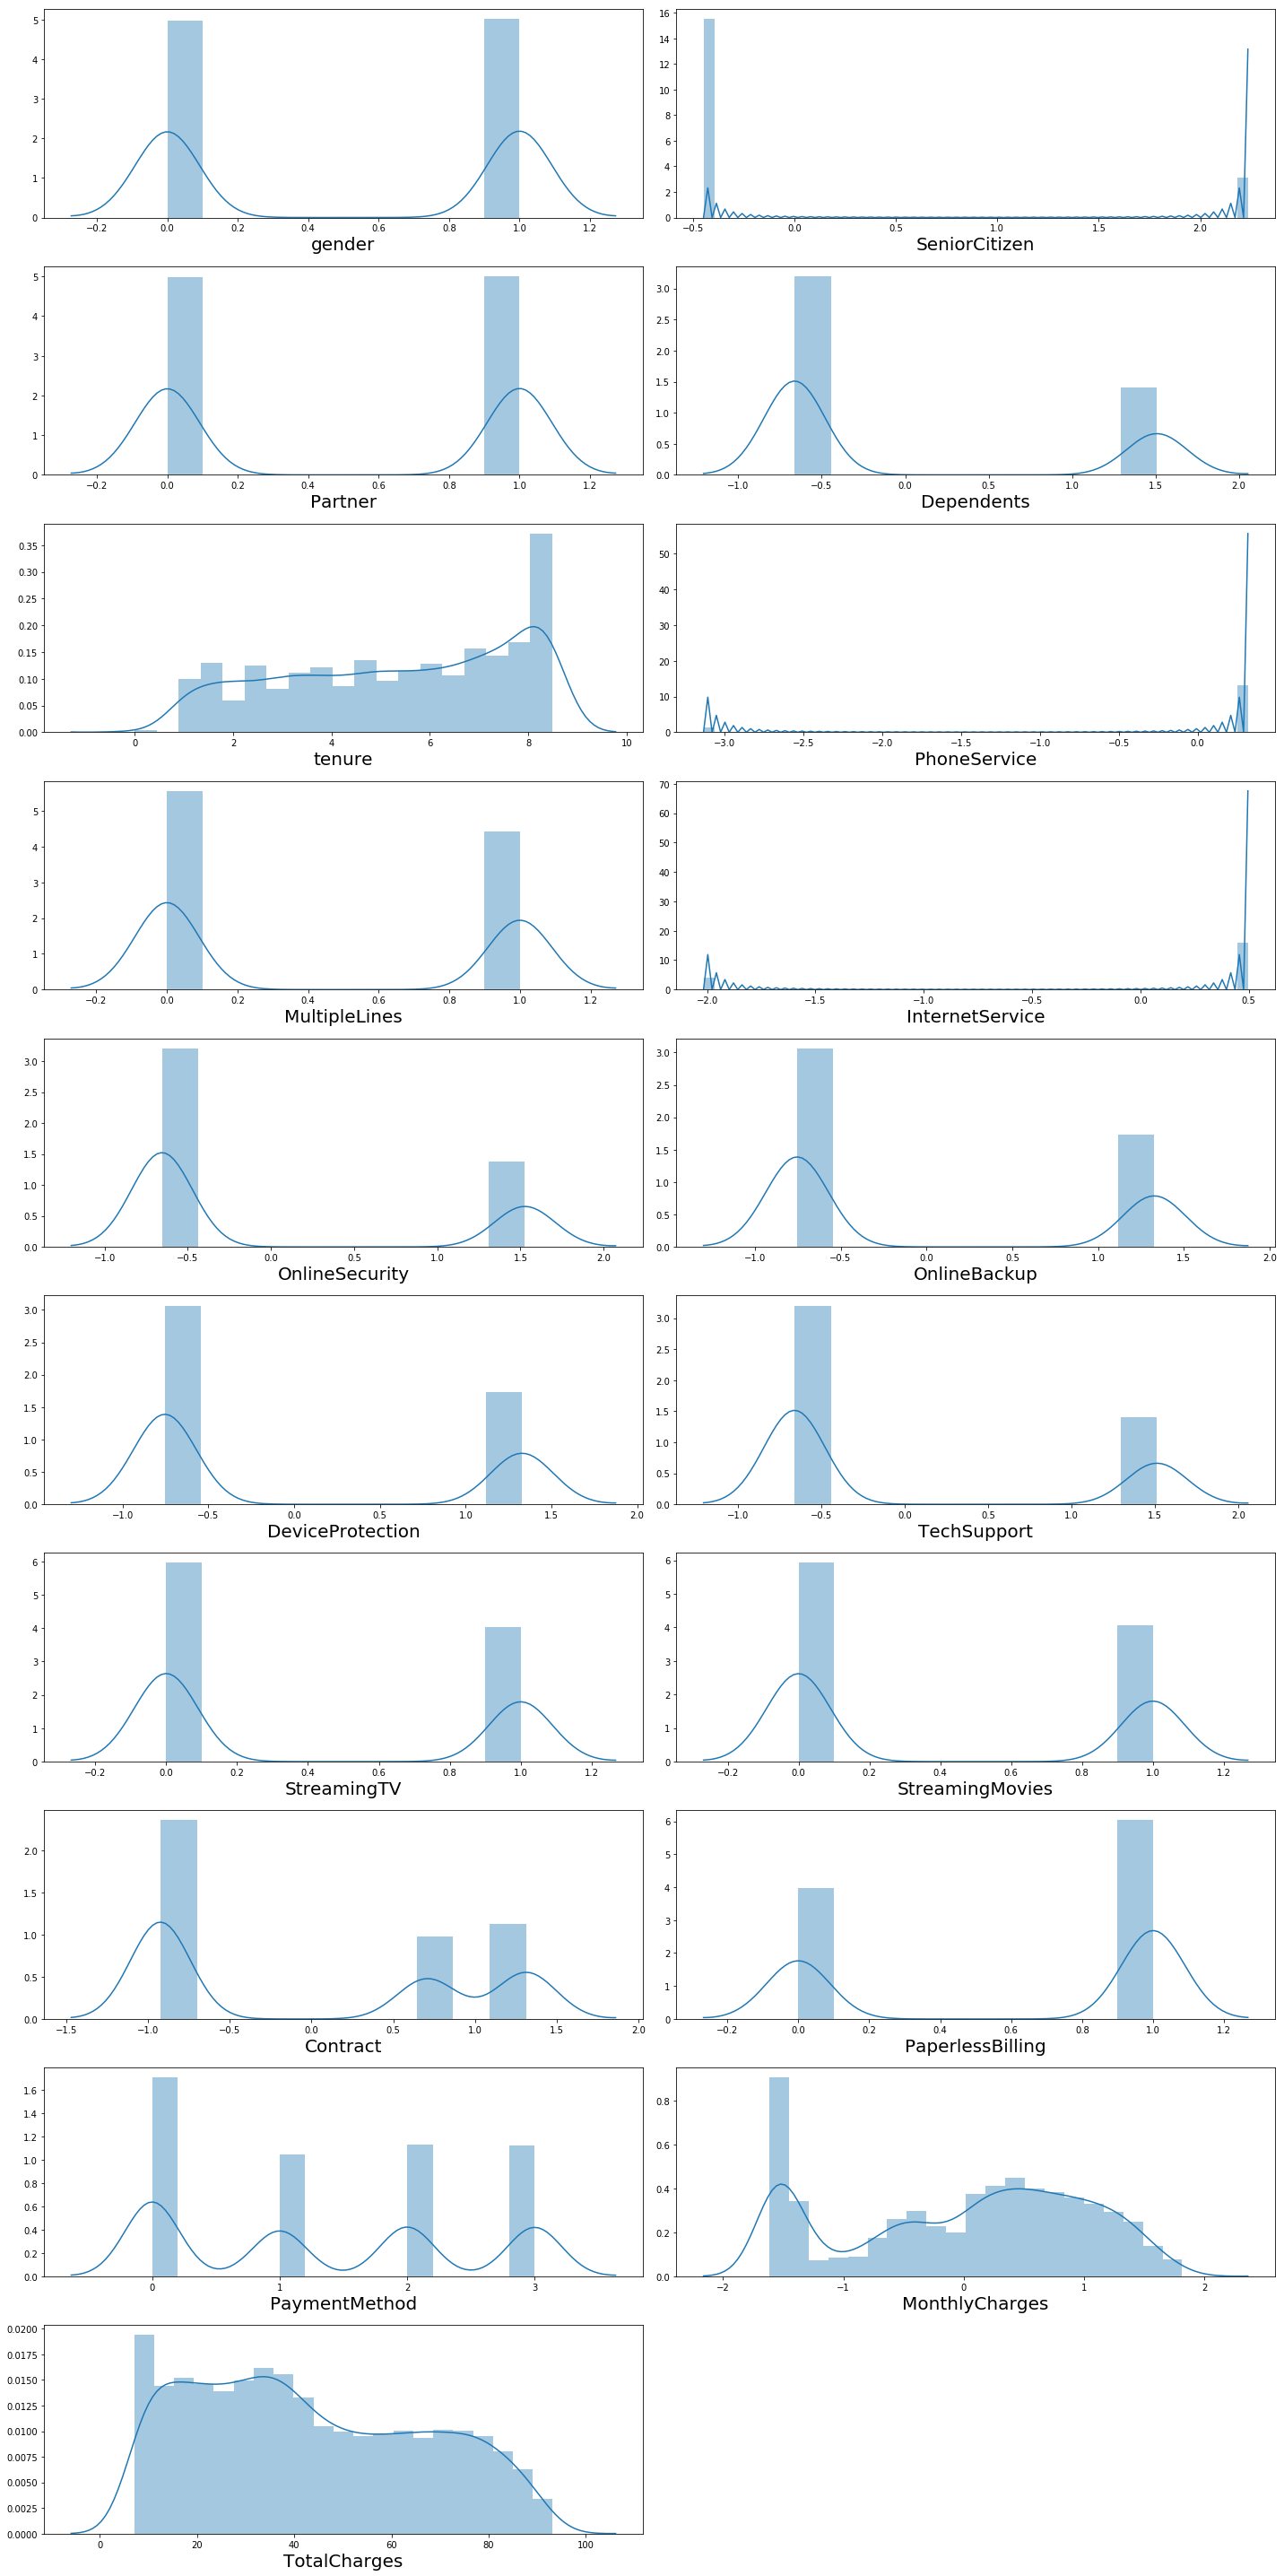

In [76]:
plt.figure(figsize=(20,40))
graph=1
for col in data.drop(columns=['Churn',"customerID"],axis=1):
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

In [77]:
data.skew()

gender             -0.007189
SeniorCitizen       1.787810
Partner            -0.002996
Dependents          0.845571
tenure             -0.296188
PhoneService       -2.812714
MultipleLines       0.226710
InternetService    -1.521086
OnlineSecurity      0.871045
OnlineBackup        0.574731
DeviceProtection    0.575406
TechSupport         0.851714
StreamingTV         0.389411
StreamingMovies     0.376132
Contract            0.237064
PaperlessBilling   -0.421231
PaymentMethod       0.182516
MonthlyCharges     -0.270862
TotalCharges        0.298622
Churn               1.109961
dtype: float64

Some skewness has been decreased.

## Model Deployment

In [78]:
X=data.drop(columns=['Churn',"customerID"],axis=1)
Y=data['Churn']

###  Feature Selection

In [79]:
## Feature Selection
from sklearn.feature_selection import SelectKBest,f_classif
best_feature=SelectKBest(score_func=f_classif,k=17)
fit=best_feature.fit(X,Y)
df_score=pd.DataFrame(fit.scores_,columns=['Feature_score'])
df_columns=pd.DataFrame(X.columns,columns=['Feature_Name'])
feature_score=pd.concat([df_columns,df_score],axis=1)


In [80]:
feature_score.dtypes

Feature_Name      object
Feature_score    float64
dtype: object

In [81]:
top=feature_score.nlargest(17,'Feature_score')

In [82]:
colName=top.Feature_Name.tolist()

In [83]:
newX=data[colName]
newX.head()

,Contract,tenure,PaymentMethod,InternetService,MonthlyCharges,TotalCharges,PaperlessBilling,OnlineSecurity,Dependents,TechSupport,SeniorCitizen,Partner,StreamingTV,StreamingMovies,OnlineBackup,MultipleLines,DeviceProtection
1,0.707796,5.830952,1,0.495879,-0.354567,43.468379,0,1.526110,-0.662974,-0.661102,-0.447455,0,0,0,-0.753152,0,1.328184
2,-0.925027,1.414214,1,0.495879,-0.458873,10.399519,1,1.526110,-0.662974,-0.661102,-0.447455,0,0,0,1.327753,0,-0.752908
3,0.707796,6.708204,2,0.495879,-0.842895,42.903963,0,1.526110,-0.662974,1.512625,-0.447455,0,0,0,-0.753152,0,1.328184
4,-0.925027,1.414214,0,0.495879,0.113864,12.314625,1,-0.655261,-0.662974,-0.661102,-0.447455,0,0,0,-0.753152,0,-0.752908
5,-0.925027,2.828427,0,0.495879,1.127418,28.644371,1,-0.655261,-0.662974,-0.661102,-0.447455,0,1,1,-0.753152,1,1.328184


In [84]:
scaler=StandardScaler()
X_=scaler.fit_transform(newX)

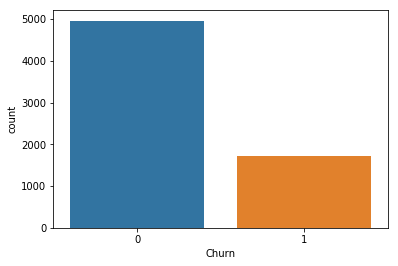

In [85]:
sns.countplot(Y)

target variable is imbalanced.

### Balacing Datasets

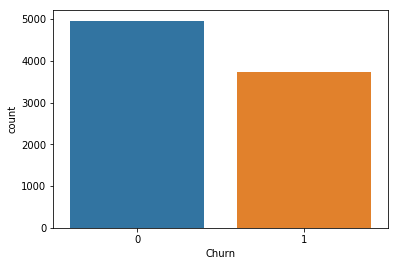

In [86]:
over_sampling=SMOTE(0.75)
X_,Y=over_sampling.fit_resample(X_,Y)

sns.countplot(Y)

Balaned our target variable.

In [87]:
X_.shape

(8678, 17)

After balancing we have now 8678 records.

In [96]:
Linear=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()
algo=[Linear,DecisionTree,RandomForest,AdaBoost,Bagging]


In [97]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(10,151,10):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

LogisticRegression():
---------------------------
---------------------------

The highest accuracy is 79.43548387096774 of model LogisticRegression() at random state 130


Confusion Matrix:

 [[824 182]
 [181 549]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1006
           1       0.75      0.75      0.75       730

    accuracy                           0.79      1736
   macro avg       0.79      0.79      0.79      1736
weighted avg       0.79      0.79      0.79      1736

DecisionTreeClassifier():
---------------------------
---------------------------

The highest accuracy is 78.62903225806451 of model DecisionTreeClassifier() at random state 100


Confusion Matrix:

 [[810 196]
 [188 542]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1006
           1       0.73      0.74      0

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [98]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(11,20):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.777599877877811 at k-fold::11

Mean CV Score of model LogisticRegression():: 0.7774840545710654 at k-fold::12

Mean CV Score of model LogisticRegression():: 0.7779490033886789 at k-fold::13

Mean CV Score of model LogisticRegression():: 0.7784065275492654 at k-fold::14

Mean CV Score of model LogisticRegression():: 0.7794473229706391 at k-fold::15

Mean CV Score of model LogisticRegression():: 0.7779485892234612 at k-fold::16

Mean CV Score of model LogisticRegression():: 0.7781815062850282 at k-fold::17

Mean CV Score of model LogisticRegression():: 0.7789814504589897 at k-fold::18

Mean CV Score of model LogisticRegression():: 0.7786403559284022 at k-fold::19


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.766655378552466 at k-fold::11

Mean CV Score of model DecisionTreeClassifier():: 0.7682759514403105 at k-fold::12

Mean CV Sc

In [99]:
CVmodel

{'LogisticRegression()': [0.7794473229706391],
 'DecisionTreeClassifier()': [0.7775174902992124],
 'RandomForestClassifier()': [0.8452728764211579],
 'AdaBoostClassifier()': [0.8060927191182677],
 'BaggingClassifier()': [0.8185411198732752]}

here we can see the maximun CV score of each model

In [101]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LogisticRegression()::1.49
DecisionTreeClassifier()::0.88
RandomForestClassifier()::0.61
AdaBoostClassifier()::0.96
BaggingClassifier()::1.38


here for model RandomForestClassifier() we get the least value i.e. the difference between the accuracy and cvScore of this model is 0.61 

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=100)

here we split the dataset in training and testing dataset at RandomState 10

### Plotting ROC Curve

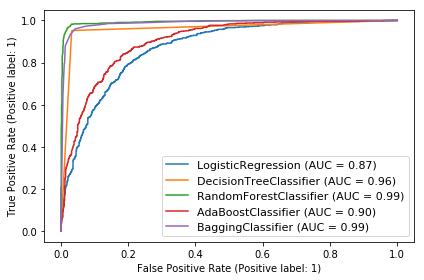

In [104]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(DecisionTree,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(Bagging,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

## Hyperparameter Tuning

In [110]:

clf=RandomForestClassifier()
param={
    "n_estimators":[102,101],
    "criterion":['gini','entropy'],
    "max_depth":[None,10],
    "min_samples_split":[3,4],
    "min_samples_leaf":[0,1,2]
}
grd=GridSearchCV(clf,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

clf=grd.best_estimator_   #reinstantiating the beast parameter to algo

clf.fit(X_train,Y_train)
ypred=clf.predict(X_test)

print("Confusion Matrix::\n",confusion_matrix(Y_test,ypred))

print("Accuracy::",accuracy_score(Y_test,ypred))

print("Classification Report::\n",classification_report(Y_test,ypred))

print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

Best Pramaeters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 102}
Confusion Matrix::
 [[871 129]
 [126 610]]
Accuracy:: 0.853110599078341
Classification Report::
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.83      0.83      0.83       736

    accuracy                           0.85      1736
   macro avg       0.85      0.85      0.85      1736
weighted avg       0.85      0.85      0.85      1736



Predicted values:
 [0 0 0 ... 0 0 0]


The dataframe for the actual & predicted values:

       Actual data  Predicted
435             0          0
2295            0          0
1760            0          0
5642            0          1
3817            0          0
7127            1          0
1928            0          0
6848            1          0
3066            0          1
4534            1          0
446             0          1
8495   

slight increased in accuracy after tuning

### Saving Model

In [111]:
import pickle
pickle.dump(clf,open("CustomerChurn_prediction.pickle","wb"))